# Question 2: Grouping Users together

The question 2 from the Homwork 4 of ADM is based on the dataset 'vodclickstream_uk_movies_03' which covers user behaviours on Netflix's platform from users in the UK.  It only includes desktop and laptop activity (which Netflix estimate is around 25% of global traffic) and is for a fixed window of time (January 2017 to June 2019, inclusive).
In particular, it is componed by 624.244 rows and 8 columns: 'Unnamed: 0',	'datetime',	'duration',	'title', 'genres', 'release_date', 'movie_id' and 'user_id'. Each row indicates the access performed by that user, and the other 8 features provide information about the different characteristics of that access.

In [1]:
import pandas as pd
import os
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
os.chdir('C:\\Users\\Jacopo\\Downloads\\ADM\\Homework 4')
dataset = pd.read_csv('vodclickstream_uk_movies_03.csv')

In [3]:
dataset = dataset[dataset['genres'] != 'NOT AVAILABLE']
dataset = dataset[dataset['duration'] >= 0]

The only 2 cleaning operation that we decided to implement, before proceeding with the question's points, are:
- cutting all the rows that don't have a genre, so all the cases in which the value under that column is 'NOT AVAILABLE'
- cutting all the rows that have a duration smaller than 0, so a negative duration

In [4]:
dataset

,Unnamed: 0,datetime,duration,title,genres,release_date,movie_id,user_id
0,58773,2017-01-01 01:15:09,0.0,"Angus, Thongs and Perfect Snogging","Comedy, Drama, Romance",2008-07-25,26bd5987e8,1dea19f6fe
1,58774,2017-01-01 13:56:02,0.0,The Curse of Sleeping Beauty,"Fantasy, Horror, Mystery, Thriller",2016-06-02,f26ed2675e,544dcbc510
2,58775,2017-01-01 15:17:47,10530.0,London Has Fallen,"Action, Thriller",2016-03-04,f77e500e7a,7cbcc791bf
3,58776,2017-01-01 16:04:13,49.0,Vendetta,"Action, Drama",2015-06-12,c74aec7673,ebf43c36b6
4,58777,2017-01-01 19:16:37,0.0,The SpongeBob SquarePants Movie,"Animation, Action, Adventure, Comedy, Family, ...",2004-11-19,a80d6fc2aa,a57c992287
...,...,...,...,...,...,...,...,...
671731,730504,2019-06-30 21:37:08,851.0,Oprah Presents When They See Us Now,Talk-Show,2019-06-12,43cd23f30f,57501964fd
671732,730505,2019-06-30 21:49:34,91157.0,HALO Legends,"Animation, Action, Adventure, Family, Sci-Fi",2010-02-16,febf42d55f,d4fcb079ba
671733,730506,2019-06-30 22:00:44,0.0,Pacific Rim,"Action, Adventure, Sci-Fi",2013-07-12,7b15e5ada1,4a14a2cd5a
671734,730507,2019-06-30 22:04:23,0.0,ReMastered: The Two Killings of Sam Cooke,"Documentary, Music",2019-02-08,52d49c515a,0b8163ea4b


## Point 2.1: getting your data + feature engeneering

The goal of the Point 2.1 is to create a new dataframe from the original one, mentioned above, that will have for each row a unique user_id with different characteristics, extracted from the information provided by the original dataframe. We expect to have as final output a dataframe composed by 16 columns and 150.062 rows.
The output dataset contains 150.963 rows, where each row corresponds to 1 unique user_id; through this table's structure we can focus on gaining information about the users and their behaviour.

### Point 2.1.2

#### Point 2.1.2 a: favourite_genre

In [5]:
dataset_favourite = dataset[['user_id','genres','duration']].copy()
dataset_favourite['genres'] = dataset_favourite['genres'].apply(lambda row: row.split(','))
dataset_favourite_exploded = dataset_favourite.explode('genres')
dataset_favourite_result = dataset_favourite_exploded.groupby(['user_id', 'genres'])['duration'].sum().reset_index()
idx_duration = dataset_favourite_result.groupby('user_id')['duration'].idxmax()
dataset_result_max_duration = dataset_favourite_result.loc[idx_duration]
favourite_genre = dataset_result_max_duration[['user_id', 'genres']]
favourite_genre = favourite_genre.rename(columns={'genres': 'favourite_genre'})
favourite_genre = favourite_genre.reset_index(drop=True)
favourite_genre

,user_id,favourite_genre
0,00004e2862,Drama
1,000052a0a0,Action
2,000090e7c8,Sci-Fi
3,000118a755,Horror
4,000296842d,Mystery
...,...,...
150958,fffd9bf758,Crime
150959,fffe7b777b,Sci-Fi
150960,fffeac83be,Drama
150961,ffff2c5f9e,Comedy


This code represents the first step of the point 2.1 and the first step of the composition of the new dataset from the original one. In particular, we start from the original dataset exstracting 3 columns from it: user_id, genres and duration. The first necessary action is the splitting of the values inside the column 'genres', this was necessary for the application of the next step, which is the explosion of the genres column to have for each user all the genres watched.
After this step, was necessary to calculate the genre with the highiest duration asscoiated to it, so in the final plot we will have just 2 column, one with the user_id and anther one, called 'favourite_genre', with the genres watched the most by that user.

#### Point 2.1.2 b: avreage_click_duration

In [6]:
dataset_average_duration = dataset.groupby(by = 'user_id').duration.mean().reset_index()
dataset_average_duration.rename(columns={'duration': 'average_click_duration'}, inplace=True)
dataset_point_2 = pd.merge(favourite_genre, dataset_average_duration, on='user_id')
dataset_point_2

,user_id,favourite_genre,average_click_duration
0,00004e2862,Drama,0.000000
1,000052a0a0,Action,2024.166667
2,000090e7c8,Sci-Fi,0.000000
3,000118a755,Horror,0.000000
4,000296842d,Mystery,11044.000000
...,...,...,...
150958,fffd9bf758,Crime,8495.000000
150959,fffe7b777b,Sci-Fi,1785.000000
150960,fffeac83be,Drama,40606.272727
150961,ffff2c5f9e,Comedy,0.000000


The output of this code represents the dataset obtained by the point 2.1.2. and merged with the dataset for the average_click_duration, in particular this new feature has been created by grouping according the user_id, and calculating the avreage, for each user_id, of the duration related to all the accesses done.

#### Point 2.1.2 c: favourite_day_moment

In [7]:
dataset.datetime = pd.to_datetime(dataset.datetime)
dataset.release_date = pd.to_datetime(dataset.release_date, errors='coerce')
dataset_point_2_1_2_c = dataset[['user_id','datetime','duration']].copy()
dataset_point_2_1_2_c['favourite_day_moment'] = pd.cut(dataset_point_2_1_2_c['datetime'].dt.hour, bins = [5, 12, 20, 24], labels = ['Morning','Afternoon','Night'], include_lowest=True, right = False)
time_of_the_day_df = dataset_point_2_1_2_c.groupby('user_id')['favourite_day_moment'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()
dataset_point_2 = pd.merge(dataset_point_2, time_of_the_day_df, on='user_id')
dataset_point_2

,user_id,favourite_genre,average_click_duration,favourite_day_moment
0,00004e2862,Drama,0.000000,Night
1,000052a0a0,Action,2024.166667,Night
2,000090e7c8,Sci-Fi,0.000000,Night
3,000118a755,Horror,0.000000,Night
4,000296842d,Mystery,11044.000000,Night
...,...,...,...,...
150958,fffd9bf758,Crime,8495.000000,Afternoon
150959,fffe7b777b,Sci-Fi,1785.000000,Afternoon
150960,fffeac83be,Drama,40606.272727,Night
150961,ffff2c5f9e,Comedy,0.000000,Afternoon


To get as output the third new feature 'favourite_day_moment', firstly we converted the column datetime thourgh the pandas' function 'to_fatetime()'; after the conversion we created a new feature 'favourite_day_moment', form the original datetime's values that were organised in the following way: 2017-01-01 01:15:09 (for example) so 'YYYY-MM-DD HOUR', the hour through the command '.dt.hour' to get the exact moment to the watching session. After this, we established 3 time intervals correspong to 3 moments of the day: Morning from 5 A.M. to 12 P.M., Afternoon from 1 P.M. to 8 P.M. and Night from 9 P.M. to 4 A.M.; then once we created these intervals we groupedby according the user_id and for each user we took the value, among Morning, Afterrnon and Night, which appeared the most. Finally, the output has been ,erged with the dataset_point_2.

#### Point 2.1.2 d: old_movies_lover

In [8]:
dataset_2_1_2_d = dataset[['user_id','release_date']].copy()
dataset_2_1_2_d['release_date'] = pd.to_datetime(dataset_2_1_2_d['release_date'], errors='coerce')
dataset_2_1_2_d['released_before_2010'] = dataset_2_1_2_d['release_date'].dt.year < 2010
user_grouped = dataset_2_1_2_d.groupby('user_id').agg(total_old_movies=pd.NamedAgg(column='released_before_2010', aggfunc='sum'))
user_grouped['old_movies_lover'] = user_grouped['total_old_movies'] > 3
user_grouped.reset_index(inplace=True)
movieslover_dataset = user_grouped[['user_id', 'old_movies_lover']]
dataset_point_2 = pd.merge(dataset_point_2, movieslover_dataset, on='user_id')
dataset_point_2

,user_id,favourite_genre,average_click_duration,favourite_day_moment,old_movies_lover
0,00004e2862,Drama,0.000000,Night,False
1,000052a0a0,Action,2024.166667,Night,True
2,000090e7c8,Sci-Fi,0.000000,Night,False
3,000118a755,Horror,0.000000,Night,False
4,000296842d,Mystery,11044.000000,Night,False
...,...,...,...,...,...
150958,fffd9bf758,Crime,8495.000000,Afternoon,False
150959,fffe7b777b,Sci-Fi,1785.000000,Afternoon,False
150960,fffeac83be,Drama,40606.272727,Night,False
150961,ffff2c5f9e,Comedy,0.000000,Afternoon,False


The goal of this point 2.1.2 d is to establish if that user is an 'old_movie_lover'; before performing and implementing the code we assumed that a user could have been considered an old_movie_lover if, among all the movies related to the accesses, had watched at least 3 movies with a release_date lower than the year 2010, so movies published before the 2010. To do that, the function to_datetime() has been used again, together with function alrewady showd such has gourpby.

#### Point 2.1.2 e: avreage_time_spent_per_day

In [9]:
dataset_2_1_2_e = dataset[['user_id','duration','datetime']].copy()
dataset_2_1_2_e['datetime'] = pd.to_datetime(dataset_2_1_2_e['datetime'], errors='coerce')
dataset_2_1_2_e['datetime'] = dataset_2_1_2_e['datetime'].dt.date
daily_avg_duration = dataset_2_1_2_e.groupby(['user_id', 'datetime'])['duration'].mean().reset_index()
daily_avg_duration = daily_avg_duration.groupby('user_id')['duration'].mean().reset_index()
daily_avg_duration.rename(columns={'duration': 'average_time_spent_per_day'}, inplace=True)
dataset_point_2 = pd.merge(dataset_point_2, daily_avg_duration, on='user_id')
dataset_point_2

,user_id,favourite_genre,average_click_duration,favourite_day_moment,old_movies_lover,average_time_spent_per_day
0,00004e2862,Drama,0.000000,Night,False,0.000000
1,000052a0a0,Action,2024.166667,Night,True,2692.277778
2,000090e7c8,Sci-Fi,0.000000,Night,False,0.000000
3,000118a755,Horror,0.000000,Night,False,0.000000
4,000296842d,Mystery,11044.000000,Night,False,9671.950000
...,...,...,...,...,...,...
150958,fffd9bf758,Crime,8495.000000,Afternoon,False,8495.000000
150959,fffe7b777b,Sci-Fi,1785.000000,Afternoon,False,1785.000000
150960,fffeac83be,Drama,40606.272727,Night,False,44756.750000
150961,ffff2c5f9e,Comedy,0.000000,Afternoon,False,0.000000


The final feature for the point 2.1.2 was the average time per day spent by each user on Netflix's platform, the idea behind the code is the following one: a first groupby is performed, in order to have for each day the user watched Netflix the average time spent (in seconds, by the column duration) because there were cases in which for the same day the user performed more than 1 access; a second  groupy has been implemented, this time to calculate the average among all the days' averages, to get the average time spent per day by the user.

### Point 2.1.3

The goal of this Point, is to add to the 5 new features created, other 10 features, again, just using the information provided by the original dataset. In this case the features that has been selected are:
- feature 1 genres_watched: how many different genres that person watched
- feature 2 prolific_year: the year with more minutes watched
- feature 3 prolific_day: the day with more minutes wtahced
- feature 4 total_film_watched: the total number of movies watched by each user
- feature 5 favourite_movie: the title of the movie with the highiest duration
- feature 6 weekend_watcher: how many times, so how many accesses, that person watched movies in the weekend days
- feature 7 week_days_watcher: how many times, so how many accesses, that person watched movies in the week days
- feature 8 average_year_release: average release year of the movies watched by that user
- feature 9 favourite_week_day: preferred day of the week to watch movies, so the week of the day with more accesses for each user
- feature 10 std_film_duration: variety in movie duration, the standard deviation of the duration of movies watched by that person


#### Feature 1: genres_watched

In [10]:
dataset_point_2_3 = dataset[['user_id','genres']].copy()
dataset_point_2_3['genres'] = dataset_point_2_3['genres'].apply(lambda row: row.split(',') if isinstance(row, str) else row)
dataset_point_2_3 = dataset_point_2_3[dataset_point_2_3.genres != 'NOT AVAILABLE']

def eterogenity_genres(listt):
    movie_list = [item for sublist in listt for item in sublist]
    counts = Counter(movie_list)
    count_different_movie = len(counts)
    return count_different_movie

dataset_genres_count = dataset_point_2_3.groupby('user_id')['genres'].apply(lambda x: eterogenity_genres(x)).reset_index()
dataset_genres_count.rename(columns={'genres': 'genres_watched'}, inplace=True)
dataset_point_2 = pd.merge(dataset_point_2, dataset_genres_count, on='user_id')
dataset_point_2

,user_id,favourite_genre,average_click_duration,favourite_day_moment,old_movies_lover,average_time_spent_per_day,genres_watched
0,00004e2862,Drama,0.000000,Night,False,0.000000,3
1,000052a0a0,Action,2024.166667,Night,True,2692.277778,19
2,000090e7c8,Sci-Fi,0.000000,Night,False,0.000000,3
3,000118a755,Horror,0.000000,Night,False,0.000000,1
4,000296842d,Mystery,11044.000000,Night,False,9671.950000,4
...,...,...,...,...,...,...,...
150958,fffd9bf758,Crime,8495.000000,Afternoon,False,8495.000000,3
150959,fffe7b777b,Sci-Fi,1785.000000,Afternoon,False,1785.000000,3
150960,fffeac83be,Drama,40606.272727,Night,False,44756.750000,12
150961,ffff2c5f9e,Comedy,0.000000,Afternoon,False,0.000000,5


To create the feature 'genres_watched' we decided to implement the function 'eterognity_genres' to calculate, for each user, how many different genres has been watched.

#### Feature 2: prolific_year

In [11]:
dataset_feature_2 = dataset[['user_id','datetime','duration']].copy()
dataset_feature_2.datetime = pd.to_datetime(dataset_feature_2.datetime)
dataset_feature_2['year'] = dataset_feature_2['datetime'].dt.year
user_year_grouped = dataset_feature_2.groupby(['user_id', 'year'])['duration'].sum().reset_index()
prolific_year_idx = user_year_grouped.groupby('user_id')['duration'].idxmax()
prolific_years = user_year_grouped.loc[prolific_year_idx, ['user_id', 'year']]
prolific_years.columns = ['user_id', 'prolific_year']
dataset_point_2 = pd.merge(dataset_point_2, prolific_years, on='user_id')
dataset_point_2

,user_id,favourite_genre,average_click_duration,favourite_day_moment,old_movies_lover,average_time_spent_per_day,genres_watched,prolific_year
0,00004e2862,Drama,0.000000,Night,False,0.000000,3,2017
1,000052a0a0,Action,2024.166667,Night,True,2692.277778,19,2017
2,000090e7c8,Sci-Fi,0.000000,Night,False,0.000000,3,2018
3,000118a755,Horror,0.000000,Night,False,0.000000,1,2018
4,000296842d,Mystery,11044.000000,Night,False,9671.950000,4,2018
...,...,...,...,...,...,...,...,...
150958,fffd9bf758,Crime,8495.000000,Afternoon,False,8495.000000,3,2017
150959,fffe7b777b,Sci-Fi,1785.000000,Afternoon,False,1785.000000,3,2017
150960,fffeac83be,Drama,40606.272727,Night,False,44756.750000,12,2017
150961,ffff2c5f9e,Comedy,0.000000,Afternoon,False,0.000000,5,2017


For this feature, we want to have a new column called 'prolific_year' that shows what is the year in which the user has watched more movies, according to the duration.

#### Feature 3: prolific_day

In [12]:
dataset_feature_3 = dataset[['user_id','datetime','duration']].copy()
dataset_feature_3.datetime = pd.to_datetime(dataset_feature_2.datetime)
dataset_feature_3['day'] = dataset_feature_3['datetime'].dt.date
user_day_grouped = dataset_feature_3.groupby(['user_id', 'day'])['duration'].sum().reset_index()
prolific_day_idx = user_day_grouped.groupby('user_id')['duration'].idxmax()
prolific_days = user_day_grouped.loc[prolific_day_idx, ['user_id', 'day']]
prolific_days.columns = ['user_id', 'prolific_day']
dataset_point_2 = pd.merge(dataset_point_2, prolific_days, on='user_id')
dataset_point_2

,user_id,favourite_genre,average_click_duration,favourite_day_moment,old_movies_lover,average_time_spent_per_day,genres_watched,prolific_year,prolific_day
0,00004e2862,Drama,0.000000,Night,False,0.000000,3,2017,2017-12-05
1,000052a0a0,Action,2024.166667,Night,True,2692.277778,19,2017,2017-06-26
2,000090e7c8,Sci-Fi,0.000000,Night,False,0.000000,3,2018,2018-03-09
3,000118a755,Horror,0.000000,Night,False,0.000000,1,2018,2018-06-14
4,000296842d,Mystery,11044.000000,Night,False,9671.950000,4,2018,2018-12-31
...,...,...,...,...,...,...,...,...,...
150958,fffd9bf758,Crime,8495.000000,Afternoon,False,8495.000000,3,2017,2017-06-21
150959,fffe7b777b,Sci-Fi,1785.000000,Afternoon,False,1785.000000,3,2017,2017-08-19
150960,fffeac83be,Drama,40606.272727,Night,False,44756.750000,12,2017,2017-09-18
150961,ffff2c5f9e,Comedy,0.000000,Afternoon,False,0.000000,5,2017,2017-07-23


For this feature, we want to have a new column called 'prolific_day' that shows what is the day in which the user has watched more movies, according to the duration.

#### Feature 4: total_film_watched

In [13]:
filtered_dataset = dataset[dataset['duration'] != 0]
dataset_feature_4 = filtered_dataset.groupby('user_id').size().reset_index(name='total_film_watched')
users_with_all_zeros = set(dataset['user_id'].unique()) - set(filtered_dataset['user_id'].unique())
users_with_all_zeros_df = pd.DataFrame({'user_id': list(users_with_all_zeros), 'total_film_watched': 0})
dataset_feature_4 = pd.concat([dataset_feature_4, users_with_all_zeros_df], ignore_index=True)
dataset_point_2 = pd.merge(dataset_point_2, dataset_feature_4, on='user_id')
dataset_point_2

,user_id,favourite_genre,average_click_duration,favourite_day_moment,old_movies_lover,average_time_spent_per_day,genres_watched,prolific_year,prolific_day,total_film_watched
0,00004e2862,Drama,0.000000,Night,False,0.000000,3,2017,2017-12-05,0
1,000052a0a0,Action,2024.166667,Night,True,2692.277778,19,2017,2017-06-26,14
2,000090e7c8,Sci-Fi,0.000000,Night,False,0.000000,3,2018,2018-03-09,0
3,000118a755,Horror,0.000000,Night,False,0.000000,1,2018,2018-06-14,0
4,000296842d,Mystery,11044.000000,Night,False,9671.950000,4,2018,2018-12-31,4
...,...,...,...,...,...,...,...,...,...,...
150958,fffd9bf758,Crime,8495.000000,Afternoon,False,8495.000000,3,2017,2017-06-21,1
150959,fffe7b777b,Sci-Fi,1785.000000,Afternoon,False,1785.000000,3,2017,2017-08-19,1
150960,fffeac83be,Drama,40606.272727,Night,False,44756.750000,12,2017,2017-09-18,10
150961,ffff2c5f9e,Comedy,0.000000,Afternoon,False,0.000000,5,2017,2017-07-23,0


Another column we decided to include is the total movies watched by the user. The only thing is worth to specify is that all the cases in which the duration corresponds to 0 hasn't been considered to count the total of film watched, at the same time, all the cases in which the user has all 0 as values under the column duration has been included, inserting 0 as a value of the column total_film_watched.

#### Feature 5: favourite_movie

In [14]:
dataset_feature_5 = dataset[['user_id','duration','title']].copy()
dataset_feature_5 = dataset_feature_5.loc[dataset_feature_5.groupby('user_id')['duration'].idxmax()]
dataset_feature_5.drop(columns=['duration'], inplace=True)
dataset_feature_5.rename(columns={'title': 'favourite_movie'}, inplace=True)
dataset_point_2 = pd.merge(dataset_point_2, dataset_feature_5, on='user_id')
dataset_point_2

,user_id,favourite_genre,average_click_duration,favourite_day_moment,old_movies_lover,average_time_spent_per_day,genres_watched,prolific_year,prolific_day,total_film_watched,favourite_movie
0,00004e2862,Drama,0.000000,Night,False,0.000000,3,2017,2017-12-05,0,Hannibal
1,000052a0a0,Action,2024.166667,Night,True,2692.277778,19,2017,2017-06-26,14,Resident Evil: Retribution
2,000090e7c8,Sci-Fi,0.000000,Night,False,0.000000,3,2018,2018-03-09,0,Mute
3,000118a755,Horror,0.000000,Night,False,0.000000,1,2018,2018-06-14,0,The Omen
4,000296842d,Mystery,11044.000000,Night,False,9671.950000,4,2018,2018-12-31,4,Black Mirror: Bandersnatch
...,...,...,...,...,...,...,...,...,...,...,...
150958,fffd9bf758,Crime,8495.000000,Afternoon,False,8495.000000,3,2017,2017-06-21,1,The Fear of 13
150959,fffe7b777b,Sci-Fi,1785.000000,Afternoon,False,1785.000000,3,2017,2017-08-19,1,The Circle
150960,fffeac83be,Drama,40606.272727,Night,False,44756.750000,12,2017,2017-09-18,10,Fight Club
150961,ffff2c5f9e,Comedy,0.000000,Afternoon,False,0.000000,5,2017,2017-07-23,0,Forks Over Knives


#### Feature 6: weekend_watcher

In [15]:
dataset_feature_6 = dataset[['user_id','datetime']].copy()
dataset_feature_6['day_of_the_week'] = dataset['datetime'].dt.day_name()
day_mapping = {'Monday': 1,'Tuesday': 2,'Wednesday': 3,'Thursday': 4,'Friday': 5,'Saturday': 6,'Sunday': 7}
dataset_feature_6['day_number'] = dataset_feature_6['day_of_the_week'].map(day_mapping)

weekend_mapping = {'Monday': False, 'Tuesday': False, 'Wednesday': False, 'Thursday': False, 'Friday': False, 'Saturday': True, 'Sunday': True}
dataset_feature_6['is_weekend'] = dataset_feature_6['day_of_the_week'].map(weekend_mapping)

dataset_feature_6 = dataset_feature_6.groupby('user_id')['is_weekend'].sum().reset_index(name='weekend_watcher')
dataset_point_2 = pd.merge(dataset_point_2, dataset_feature_6, on='user_id')
dataset_point_2

,user_id,favourite_genre,average_click_duration,favourite_day_moment,old_movies_lover,average_time_spent_per_day,genres_watched,prolific_year,prolific_day,total_film_watched,favourite_movie,weekend_watcher
0,00004e2862,Drama,0.000000,Night,False,0.000000,3,2017,2017-12-05,0,Hannibal,0
1,000052a0a0,Action,2024.166667,Night,True,2692.277778,19,2017,2017-06-26,14,Resident Evil: Retribution,11
2,000090e7c8,Sci-Fi,0.000000,Night,False,0.000000,3,2018,2018-03-09,0,Mute,0
3,000118a755,Horror,0.000000,Night,False,0.000000,1,2018,2018-06-14,0,The Omen,0
4,000296842d,Mystery,11044.000000,Night,False,9671.950000,4,2018,2018-12-31,4,Black Mirror: Bandersnatch,2
...,...,...,...,...,...,...,...,...,...,...,...,...
150958,fffd9bf758,Crime,8495.000000,Afternoon,False,8495.000000,3,2017,2017-06-21,1,The Fear of 13,0
150959,fffe7b777b,Sci-Fi,1785.000000,Afternoon,False,1785.000000,3,2017,2017-08-19,1,The Circle,1
150960,fffeac83be,Drama,40606.272727,Night,False,44756.750000,12,2017,2017-09-18,10,Fight Club,1
150961,ffff2c5f9e,Comedy,0.000000,Afternoon,False,0.000000,5,2017,2017-07-23,0,Forks Over Knives,2


To correclty calculate if the user is a weekend wathcher, so how many times in weekend days, among the days represented in the original dataset for each user, she/he accessed Netflix's platform, it was necessary to use the command 'dt.day_name' from to_datetime, and asscoiate to each day a number from 1 to 7; after this is determined when a day is a week day or a week day, finally a groupby is made and is counted for each user the number of weekend days observed.

#### Feature 7: week_days_watcher

In [16]:
dataset_feature_7 = dataset[['user_id','datetime']].copy()
dataset_feature_7['day_of_the_week'] = dataset['datetime'].dt.day_name()
day_mapping = {'Monday': 1,'Tuesday': 2,'Wednesday': 3,'Thursday': 4,'Friday': 5,'Saturday': 6,'Sunday': 7}
dataset_feature_7['day_number'] = dataset_feature_7['day_of_the_week'].map(day_mapping)

weekend_mapping = {'Monday': True, 'Tuesday': True, 'Wednesday': True, 'Thursday': True, 'Friday': True, 'Saturday': False, 'Sunday': False}
dataset_feature_7['is_weekend'] = dataset_feature_7['day_of_the_week'].map(weekend_mapping)

dataset_feature_7 = dataset_feature_7.groupby('user_id')['is_weekend'].sum().reset_index(name='week_days_watcher')
dataset_point_2 = pd.merge(dataset_point_2, dataset_feature_7, on='user_id')
dataset_point_2

,user_id,favourite_genre,average_click_duration,favourite_day_moment,old_movies_lover,average_time_spent_per_day,genres_watched,prolific_year,prolific_day,total_film_watched,favourite_movie,weekend_watcher,week_days_watcher
0,00004e2862,Drama,0.000000,Night,False,0.000000,3,2017,2017-12-05,0,Hannibal,0,1
1,000052a0a0,Action,2024.166667,Night,True,2692.277778,19,2017,2017-06-26,14,Resident Evil: Retribution,11,13
2,000090e7c8,Sci-Fi,0.000000,Night,False,0.000000,3,2018,2018-03-09,0,Mute,0,1
3,000118a755,Horror,0.000000,Night,False,0.000000,1,2018,2018-06-14,0,The Omen,0,1
4,000296842d,Mystery,11044.000000,Night,False,9671.950000,4,2018,2018-12-31,4,Black Mirror: Bandersnatch,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150958,fffd9bf758,Crime,8495.000000,Afternoon,False,8495.000000,3,2017,2017-06-21,1,The Fear of 13,0,1
150959,fffe7b777b,Sci-Fi,1785.000000,Afternoon,False,1785.000000,3,2017,2017-08-19,1,The Circle,1,0
150960,fffeac83be,Drama,40606.272727,Night,False,44756.750000,12,2017,2017-09-18,10,Fight Club,1,10
150961,ffff2c5f9e,Comedy,0.000000,Afternoon,False,0.000000,5,2017,2017-07-23,0,Forks Over Knives,2,0


This feature has been created from a similar code with respect to the previous one, the only difference is in the calculation of the week days and weekend days.

#### Feature 8: average_year_release

In [17]:
dataset_feature_8 = dataset[['user_id','release_date']].copy()
dataset_feature_8.release_date = pd.to_datetime(dataset.release_date, errors='coerce')
dataset_feature_8['year_release'] = dataset_feature_8['release_date'].dt.year
dataset_feature_8 = dataset_feature_8.groupby(by='user_id')['year_release'].mean().reset_index()
dataset_feature_8['year_release'] = dataset_feature_8['year_release'].round().astype(pd.Int32Dtype(), errors='ignore')
dataset_feature_8.rename(columns={'year_release': 'average_year_release'}, inplace=True)
dataset_point_2 = pd.merge(dataset_point_2, dataset_feature_8, on='user_id')
dataset_point_2

,user_id,favourite_genre,average_click_duration,favourite_day_moment,old_movies_lover,average_time_spent_per_day,genres_watched,prolific_year,prolific_day,total_film_watched,favourite_movie,weekend_watcher,week_days_watcher,average_year_release
0,00004e2862,Drama,0.000000,Night,False,0.000000,3,2017,2017-12-05,0,Hannibal,0,1,2001
1,000052a0a0,Action,2024.166667,Night,True,2692.277778,19,2017,2017-06-26,14,Resident Evil: Retribution,11,13,2008
2,000090e7c8,Sci-Fi,0.000000,Night,False,0.000000,3,2018,2018-03-09,0,Mute,0,1,2018
3,000118a755,Horror,0.000000,Night,False,0.000000,1,2018,2018-06-14,0,The Omen,0,1,1976
4,000296842d,Mystery,11044.000000,Night,False,9671.950000,4,2018,2018-12-31,4,Black Mirror: Bandersnatch,2,5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150958,fffd9bf758,Crime,8495.000000,Afternoon,False,8495.000000,3,2017,2017-06-21,1,The Fear of 13,0,1,2015
150959,fffe7b777b,Sci-Fi,1785.000000,Afternoon,False,1785.000000,3,2017,2017-08-19,1,The Circle,1,0,2017
150960,fffeac83be,Drama,40606.272727,Night,False,44756.750000,12,2017,2017-09-18,10,Fight Club,1,10,2012
150961,ffff2c5f9e,Comedy,0.000000,Afternoon,False,0.000000,5,2017,2017-07-23,0,Forks Over Knives,2,0,2010


The feature 'average_year_release', represents the avrage year of the release day for all the movies watched by that user.

#### Feature 9: favourite_week_day

In [18]:
dataset_feature_9 = dataset[['user_id','datetime']].copy()
dataset_feature_9['day_of_the_week'] = dataset['datetime'].dt.day_name()
dataset_favourite_day = dataset_feature_9.groupby(['user_id', 'day_of_the_week']).size().reset_index(name='count')
idx = dataset_favourite_day.groupby('user_id')['count'].idxmax()
favourite_day = dataset_favourite_day.loc[idx, ['user_id', 'day_of_the_week']].reset_index(drop=True)
favourite_day = favourite_day.rename(columns={'day_of_the_week': 'favourite_week_day'})
dataset_point_2 = pd.merge(dataset_point_2, favourite_day, on='user_id')
dataset_point_2

,user_id,favourite_genre,average_click_duration,favourite_day_moment,old_movies_lover,average_time_spent_per_day,genres_watched,prolific_year,prolific_day,total_film_watched,favourite_movie,weekend_watcher,week_days_watcher,average_year_release,favourite_week_day
0,00004e2862,Drama,0.000000,Night,False,0.000000,3,2017,2017-12-05,0,Hannibal,0,1,2001,Tuesday
1,000052a0a0,Action,2024.166667,Night,True,2692.277778,19,2017,2017-06-26,14,Resident Evil: Retribution,11,13,2008,Sunday
2,000090e7c8,Sci-Fi,0.000000,Night,False,0.000000,3,2018,2018-03-09,0,Mute,0,1,2018,Friday
3,000118a755,Horror,0.000000,Night,False,0.000000,1,2018,2018-06-14,0,The Omen,0,1,1976,Thursday
4,000296842d,Mystery,11044.000000,Night,False,9671.950000,4,2018,2018-12-31,4,Black Mirror: Bandersnatch,2,5,2018,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150958,fffd9bf758,Crime,8495.000000,Afternoon,False,8495.000000,3,2017,2017-06-21,1,The Fear of 13,0,1,2015,Wednesday
150959,fffe7b777b,Sci-Fi,1785.000000,Afternoon,False,1785.000000,3,2017,2017-08-19,1,The Circle,1,0,2017,Saturday
150960,fffeac83be,Drama,40606.272727,Night,False,44756.750000,12,2017,2017-09-18,10,Fight Club,1,10,2012,Wednesday
150961,ffff2c5f9e,Comedy,0.000000,Afternoon,False,0.000000,5,2017,2017-07-23,0,Forks Over Knives,2,0,2010,Sunday


Here, through the feature 'favoruite_week_day', are represented the days of the week where the users have made more accesses, according to how many times tha same day appeared.

#### Feature 10: std_film_duration

In [19]:
dataset_feature_10 = dataset[['user_id','duration']].copy()
dataset_feature_10 = dataset_feature_10.groupby(by='user_id').std().reset_index()
dataset_feature_10.rename(columns={'duration': 'std_film_duration'}, inplace=True)
dataset_point_2 = pd.merge(dataset_point_2, dataset_feature_10, on='user_id')
dataset_point_2

,user_id,favourite_genre,average_click_duration,favourite_day_moment,old_movies_lover,average_time_spent_per_day,genres_watched,prolific_year,prolific_day,total_film_watched,favourite_movie,weekend_watcher,week_days_watcher,average_year_release,favourite_week_day,std_film_duration
0,00004e2862,Drama,0.000000,Night,False,0.000000,3,2017,2017-12-05,0,Hannibal,0,1,2001,Tuesday,NaN
1,000052a0a0,Action,2024.166667,Night,True,2692.277778,19,2017,2017-06-26,14,Resident Evil: Retribution,11,13,2008,Sunday,2614.004668
2,000090e7c8,Sci-Fi,0.000000,Night,False,0.000000,3,2018,2018-03-09,0,Mute,0,1,2018,Friday,NaN
3,000118a755,Horror,0.000000,Night,False,0.000000,1,2018,2018-06-14,0,The Omen,0,1,1976,Thursday,NaN
4,000296842d,Mystery,11044.000000,Night,False,9671.950000,4,2018,2018-12-31,4,Black Mirror: Bandersnatch,2,5,2018,Monday,23331.817253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150958,fffd9bf758,Crime,8495.000000,Afternoon,False,8495.000000,3,2017,2017-06-21,1,The Fear of 13,0,1,2015,Wednesday,NaN
150959,fffe7b777b,Sci-Fi,1785.000000,Afternoon,False,1785.000000,3,2017,2017-08-19,1,The Circle,1,0,2017,Saturday,NaN
150960,fffeac83be,Drama,40606.272727,Night,False,44756.750000,12,2017,2017-09-18,10,Fight Club,1,10,2012,Wednesday,55473.624879
150961,ffff2c5f9e,Comedy,0.000000,Afternoon,False,0.000000,5,2017,2017-07-23,0,Forks Over Knives,2,0,2010,Sunday,0.000000


Through the column 'std_film_duration' is calculated the standard deviation of the film's duration for each user; sometimes are present values NaN, these are the cases in which there was just 1 observation for that user.

## Point 2.2 choose your features (variables)!

In [20]:
dataset_point_2

,user_id,favourite_genre,average_click_duration,favourite_day_moment,old_movies_lover,average_time_spent_per_day,genres_watched,prolific_year,prolific_day,total_film_watched,favourite_movie,weekend_watcher,week_days_watcher,average_year_release,favourite_week_day,std_film_duration
0,00004e2862,Drama,0.000000,Night,False,0.000000,3,2017,2017-12-05,0,Hannibal,0,1,2001,Tuesday,NaN
1,000052a0a0,Action,2024.166667,Night,True,2692.277778,19,2017,2017-06-26,14,Resident Evil: Retribution,11,13,2008,Sunday,2614.004668
2,000090e7c8,Sci-Fi,0.000000,Night,False,0.000000,3,2018,2018-03-09,0,Mute,0,1,2018,Friday,NaN
3,000118a755,Horror,0.000000,Night,False,0.000000,1,2018,2018-06-14,0,The Omen,0,1,1976,Thursday,NaN
4,000296842d,Mystery,11044.000000,Night,False,9671.950000,4,2018,2018-12-31,4,Black Mirror: Bandersnatch,2,5,2018,Monday,23331.817253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150958,fffd9bf758,Crime,8495.000000,Afternoon,False,8495.000000,3,2017,2017-06-21,1,The Fear of 13,0,1,2015,Wednesday,NaN
150959,fffe7b777b,Sci-Fi,1785.000000,Afternoon,False,1785.000000,3,2017,2017-08-19,1,The Circle,1,0,2017,Saturday,NaN
150960,fffeac83be,Drama,40606.272727,Night,False,44756.750000,12,2017,2017-09-18,10,Fight Club,1,10,2012,Wednesday,55473.624879
150961,ffff2c5f9e,Comedy,0.000000,Afternoon,False,0.000000,5,2017,2017-07-23,0,Forks Over Knives,2,0,2010,Sunday,0.000000


In [21]:
dataset_point_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150963 entries, 0 to 150962
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     150963 non-null  object 
 1   favourite_genre             150963 non-null  object 
 2   average_click_duration      150963 non-null  float64
 3   favourite_day_moment        143679 non-null  object 
 4   old_movies_lover            150963 non-null  bool   
 5   average_time_spent_per_day  150963 non-null  float64
 6   genres_watched              150963 non-null  int64  
 7   prolific_year               150963 non-null  int32  
 8   prolific_day                150963 non-null  object 
 9   total_film_watched          150963 non-null  int64  
 10  favourite_movie             150963 non-null  object 
 11  weekend_watcher             150963 non-null  int64  
 12  week_days_watcher           150963 non-null  int64  
 13  average_year_r

### Point 2.2.1

In [22]:
quantitative_features = ['average_click_duration', 'genres_watched', 'total_film_watched', 
                          'weekend_watcher', 'week_days_watcher', 'average_time_spent_per_day']
non_quantitative_features =['user_id','favourite_genre','favourite_day_moment','old_movies_lover','prolific_year','prolific_day','favourite_movie','average_year_release','favourite_week_day','std_film_duration']

data_quantitative = dataset_point_2[quantitative_features]
normalized_data = (data_quantitative - data_quantitative.min()) / (data_quantitative.max() - data_quantitative.min())
dataset_point_2 = pd.concat([dataset_point_2[non_quantitative_features], normalized_data], axis=1)
dataset_point_2

,user_id,favourite_genre,favourite_day_moment,old_movies_lover,prolific_year,prolific_day,favourite_movie,average_year_release,favourite_week_day,std_film_duration,average_click_duration,genres_watched,total_film_watched,weekend_watcher,week_days_watcher,average_time_spent_per_day
0,00004e2862,Drama,Night,False,2017,2017-12-05,Hannibal,2001,Tuesday,NaN,0.000000,0.066667,0.000000,0.000000,0.002457,0.000000
1,000052a0a0,Action,Night,True,2017,2017-06-26,Resident Evil: Retribution,2008,Sunday,2614.004668,0.000176,0.600000,0.019337,0.034591,0.031941,0.000235
2,000090e7c8,Sci-Fi,Night,False,2018,2018-03-09,Mute,2018,Friday,NaN,0.000000,0.066667,0.000000,0.000000,0.002457,0.000000
3,000118a755,Horror,Night,False,2018,2018-06-14,The Omen,1976,Thursday,NaN,0.000000,0.000000,0.000000,0.000000,0.002457,0.000000
4,000296842d,Mystery,Night,False,2018,2018-12-31,Black Mirror: Bandersnatch,2018,Monday,23331.817253,0.000963,0.100000,0.005525,0.006289,0.012285,0.000843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150958,fffd9bf758,Crime,Afternoon,False,2017,2017-06-21,The Fear of 13,2015,Wednesday,NaN,0.000741,0.066667,0.001381,0.000000,0.002457,0.000741
150959,fffe7b777b,Sci-Fi,Afternoon,False,2017,2017-08-19,The Circle,2017,Saturday,NaN,0.000156,0.066667,0.001381,0.003145,0.000000,0.000156
150960,fffeac83be,Drama,Night,False,2017,2017-09-18,Fight Club,2012,Wednesday,55473.624879,0.003540,0.366667,0.013812,0.003145,0.024570,0.003901
150961,ffff2c5f9e,Comedy,Afternoon,False,2017,2017-07-23,Forks Over Knives,2010,Sunday,0.000000,0.000000,0.133333,0.000000,0.006289,0.000000,0.000000


The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. In this case is necessary, as long as some features are in seconds such as the average_click duratuin and some other features are just absolute numbers such as genres_watched. So, it is a good idea to normalize quantitative features before performing dimensionality reduction techniques, like the Principal Component Analysis (PCA) or the Factor Analysis for Mixed Data (FAMD). Normalization is an important step because features may have different scales, and PCA is sensitive to differences in scale between variables.

### Point 2.2.2

The method that has been decided, in the first instance, and implemented to perfrom the dimensionality reduction of the 'dataset_point_2' dataframe was the Principal Component Analysis (PCA). This unsupervised dimensionality reduction technique transforms the input variables into a new set of uncorrelated variables called principal components, that will be showed in the result dataframe as PC1, PC2, ecc ecc. These principal components are linear combinations of the original variables and are raked by the amount of variace of the input that they explain. To perform this techinque in the right way is necessary to standardizze the input variables, and this step is included in the code below. The main limit of this technique, and the reason why another technique has been preferred to it is that it can be performed just for numerical variables that are, in this case, just 6 out of 16. The alternative technique is the Factor Analysis for Mixed Data (FAMD), very useful when dealing with datasets that contain both numerical and categorical variables, it combines factor analysis, used for numerical data, with multiple correspondence analysis, suitable for categorical data.

#### Technique 1: Standardization and Principal Component Analysis (PCA)

In [23]:
scaler = StandardScaler()
data_standardized = scaler.fit_transform(normalized_data)

pca = PCA(0.81) # this will create the number of PCAs necessary to keep the 81% of information, we have seen that with 95 of information kept it will create 4 PCs while with 81% of informatio it will create just 2 PCs
pca_output = pca.fit_transform(data_standardized)

dataset_only_pca = pd.DataFrame(pca_output, columns = ['PC1','PC2'])
dataset_point_2_pca = pd.concat([dataset_point_2[non_quantitative_features], dataset_only_pca], axis=1)
dataset_only_pca

print(pca.explained_variance_ratio_)

[0.48775106 0.33154806]


As we can see from the code, the amount of variance that we want to get explained is 81, this beacsue this percentage represents the maximum percentage we can have using just 2 components; in fact, turning this number from 81 to 82 would lead to the creation of a third principal component. In this way, we have 6 initial features turned into just 2 principal components. In dtails, through the command 'explained_variance_ration' we can observe how the PC1 explains the 48% of the variance and PC2 the 33%. We also conducted an experiment to try to include 'std_film_duration' into the PCA process, but at first we couldn't because of the NaN values under the std_film_duration column.

#### Technique 2: Factor Analysis for Mixed Data

In [24]:
from prince import FAMD
import matplotlib as plt
import numpy as np

col_to_delete = ['user_id','favourite_movie','std_film_duration']
dataset_point_2 = dataset_point_2.drop(col_to_delete, axis =1)

famd_implementation = FAMD(len(dataset_point_2.columns), random_state=100)
data_fit = famd_implementation.fit(dataset_point_2)

eigenvalues = famd_implementation.eigenvalues_
cum_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
threshold_variance = 0.70
num_components = np.argmax(cum_variance >= threshold_variance) + 1
print(f'Number of components: {num_components}')

famd_implementation = FAMD(n_components=9, random_state=100) 
famd_fit = famd_implementation.fit_transform(dataset_point_2)
famd_dataset = pd.DataFrame(data={'C1': famd_fit[0], 'C2': famd_fit[1], 'C3': famd_fit[2], 'C4': famd_fit[3], 'C5': famd_fit[4], 'C6': famd_fit[5], 'C7': famd_fit[6], 'C8': famd_fit[7], 'C9': famd_fit[8]})

famd_dataset

c:\Users\Jacopo\AppData\Local\Programs\Python\Python310\lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.0048150274053739535, -0.008339872105944232, -0.010766728591940597, -0.012739365070580074, -0.006809477059877979, -0.013618954119755958, -0.009630054810747907, -0.01736082820284012, -0.023588720481366798, -0.032300185775821784, -0.015969639258903896, -0.019260109621495814, -0.024075137026869767, -0.022065227558412958, -0.018648520952545634, -0.031204944069956178, -0.05635845084179306, -0.0505004334693797, -0.04766633941914586, -0.037913563703497175, -0.06387855703561558, -0.051410424392852996, -0.043866987358418916, -0.04790891777671168, -0.04618412043261412, -0.08171372471853576, -0.06071518539381934, -0.06671897684755386, -0.0742826248974249, -0.0771907614357254, -0.07970288553480114, -0.08298067972490442, -0.09072206768283166, -0.12802903445138167, -0.10202860149297108, -0.1297379626475174, -0.11754979962995823, -

Number of components: 9


c:\Users\Jacopo\AppData\Local\Programs\Python\Python310\lib\site-packages\prince\pca.py:175: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.0048150274053739535, -0.008339872105944232, -0.010766728591940597, -0.012739365070580074, -0.006809477059877979, -0.013618954119755958, -0.009630054810747907, -0.01736082820284012, -0.023588720481366798, -0.032300185775821784, -0.015969639258903896, -0.019260109621495814, -0.024075137026869767, -0.022065227558412958, -0.018648520952545634, -0.031204944069956178, -0.05635845084179306, -0.0505004334693797, -0.04766633941914586, -0.037913563703497175, -0.06387855703561558, -0.051410424392852996, -0.043866987358418916, -0.04790891777671168, -0.04618412043261412, -0.08171372471853576, -0.06071518539381934, -0.06671897684755386, -0.0742826248974249, -0.0771907614357254, -0.07970288553480114, -0.08298067972490442, -0.09072206768283166, -0.12802903445138167, -0.10202860149297108, -0.1297379626475174, -0.11754979962995823, -

,C1,C2,C3,C4,C5,C6,C7,C8,C9
0,2.745708,-1.474168,-1.487644,-2.534244,-0.423426,1.272126,0.489933,-2.344720,-0.760011
1,4.925328,-1.776839,7.218903,-3.186782,-2.167129,-2.163530,-3.391257,2.201540,-0.864405
2,-2.746177,2.669316,-3.852307,-0.144023,-4.017068,0.615529,-0.444848,-1.074708,0.507013
3,4.501333,1.843780,-0.256127,0.079990,0.822226,-0.973875,-0.769523,-2.173552,1.737852
4,-3.503085,4.885096,0.562683,-3.163995,0.865423,4.015069,-0.979376,2.623920,3.191780
...,...,...,...,...,...,...,...,...,...
150958,2.609315,-3.154737,-3.054406,-0.920236,0.566089,-3.938559,3.596407,1.352599,3.401356
150959,0.395274,-0.442696,1.887610,4.138889,-1.552562,1.107270,-0.008669,1.495245,-1.317203
150960,3.349580,-0.260346,0.901201,-2.599160,-2.194472,-1.226890,0.132128,1.141224,0.956873
150961,2.537953,-2.102128,-0.711295,0.506570,0.817372,-0.153050,-2.369519,2.640866,2.451460


This code performs the dimensionality reduction using the FAMD model from the 'prince' library, that will be used to apply the clustering algorithm from scratch. The first tsep was to delete some columns, in particular 'user_id', 'favourite_movie' and 'std_film_duration', the reason related to the first 2 is the presence of too many categories, the presence of unique values were read as different categories and this did lead to memory issues when implementing the code; the reason related to the std_film_duration was linked to the presence of NaN values. After this, an instance of the FAMD class is created with the number of components specified as the total number of columns in the modified dataset and eigenvalues are obtained from the fitted FAMD model. The cumulative vairiance is calculated and normalised and the right number of components is get keeping the 70% of the varinace. Finally, is printed the new dataset 'famd_dataset' that contains the 9 components.

## Point 2.3 Clustering

### Point 2.3.1

In [25]:
import pyspark
from pyspark.sql import SparkSession
import findspark
from pyspark.sql.types import StructType, StructField, DoubleType, StringType, BooleanType, IntegerType

In [26]:
findspark.init()
spark = SparkSession.builder.master("local[4]").getOrCreate()

famd_dataset.to_pickle('dataset_2_famd')
dataset_point_2_famd = pd.read_pickle("dataset_2_famd")

schema = StructType([StructField("C1", DoubleType(), True), StructField("C2", DoubleType(), True),
                    StructField("C3", DoubleType(), True), StructField("C4", DoubleType(), True),
                    StructField("C5", DoubleType(), True), StructField("C6", DoubleType(), True),
                    StructField("C7", DoubleType(), True), StructField("C8", DoubleType(), True), StructField("C9", DoubleType(), True)])

sdf = spark.createDataFrame(dataset_point_2_famd, schema=schema)

k = 5
rdd = sdf.rdd.map(list)
vectorized_rdd = rdd.map(lambda row: np.array(row))

def calculate_distance(x, y):
    distances = np.linalg.norm(x - y, axis=1)
    key = np.argmin(distances)
    return key, x

def kmeans_iteration(centroids, data_rdd, k):
    distances_rdd = data_rdd.map(lambda row: calculate_distance(row, centroids))
    aggregated_data = distances_rdd.combineByKey(
        lambda x: (x, 1),
        lambda acc, x: (acc[0] + x, acc[1] + 1),
        lambda acc1, acc2: (acc1[0] + acc2[0], acc1[1] + acc2[1]))
    updated_centroids = aggregated_data.mapValues(lambda acc: acc[0] / acc[1]).collect()
    K_new = {i[0]: i[1] for i in updated_centroids}
    finalist = [np.array(K_new.get(i, None)) for i in range(k) if K_new.get(i, None) is not None]
    final_centroids = np.array(finalist)
    return final_centroids

initial_centroids = np.array(dataset_point_2_famd.sample(k))
difference = 999

while difference > 0.1:
    updated_centroids = kmeans_iteration(initial_centroids, vectorized_rdd, k)
    difference = np.linalg.norm(updated_centroids - initial_centroids)
    initial_centroids = updated_centroids

print(initial_centroids)

[[-0.52293861  1.01669075 -3.70908546  0.10508203 -2.24674457 -0.22655057
  -1.56854703  0.0772776   0.12650405]
 [-0.02226577  1.46177464  1.09970382  2.2662021   2.01397778 -0.2287695
  -1.4423799   1.3602295  -0.12215788]
 [-3.77271433 -2.38181476  0.59225877 -0.69536852  0.24118738  0.0157495
   0.09723065 -0.23812994  0.17287645]
 [ 2.93452982 -1.84031855 -0.03215815  0.18309422 -0.06385701  0.2095352
   0.32025061  0.0407712  -0.04601437]
 [ 0.07823766  2.44806902  0.65462934 -0.74320127 -0.08321873 -0.01935442
   0.92101345 -0.5139303  -0.0776625 ]]


This Python script utilizes PySpark to implement the K-means clustering algorithm on the FAMD dataset with 9 columns, obtained before. The code initializes a Spark session, prepares the dataset, and converts it into a PySpark DataFrame. Just after this, the spark dataframe is converted to RDD and then to a vectorized RDD.
The function 'calculate_distance' is created to compute the Euclidean distance between 2 points in a vector space, this function is used to find the closest centroid for each data point. After this, the function kmeas_iteration represents the iteration of the k-means clustering algorithm, using the calculate_distance function, calculating the distances to all centroids. The data points are then aggregated and then new centroid positions are calculated by dividing the sum of data points for each centroid by their count. The while loop continues iterating if the variable 'difference' is greater than 0.1, in other terms, the k-means runs until the centroids converge. Then the final centroids are printed.

### Point 2.3.2

#### Method 1: Elbow

K = 2, Inertia = 931637.3501470672
K = 3, Inertia = 866729.6128886605
K = 4, Inertia = 843120.6553457523
K = 5, Inertia = 825361.9532103632
K = 6, Inertia = 793621.0810764336
K = 7, Inertia = 780371.1294074114
K = 8, Inertia = 754314.0896028625
K = 9, Inertia = 753424.4871285995


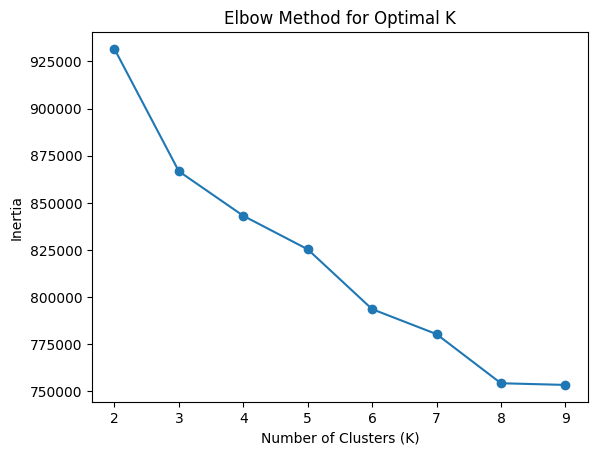

In [27]:
import matplotlib.pyplot as plt

def calculate_inertia(centroids, data_rdd):
    distances_rdd = data_rdd.map(lambda row: calculate_distance(row, centroids))
    inertia = distances_rdd.map(lambda x: np.linalg.norm(x[1] - centroids[x[0]]))
    return inertia.sum()

inertias = []

for k_value in range(2, 10):
    initial_centroids = np.array(dataset_point_2_famd.sample(k_value))
    difference = 999

    while difference > 0.1:
        updated_centroids = kmeans_iteration(initial_centroids, vectorized_rdd, k_value)
        difference = np.linalg.norm(updated_centroids - initial_centroids)
        initial_centroids = updated_centroids

    inertia = calculate_inertia(initial_centroids, vectorized_rdd)
    inertias.append(inertia)
    print(f"K = {k_value}, Inertia = {inertia}")

plt.plot(range(2, 10), inertias, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


The first technique used to find the optimal number of clusters is the 'Elbow method', the main idea behind it, is to run the k-means for a range of values of k and then polt the sum of squared ditsances or variance for each k. The elbow in the final plot represents a a point where increasing the number of clusters does not has a significat impact on the reduction of the SSD, meaning that that number of cluster could be an optimal quantity. Implementging this method, the results is that 5 is a good number of clsuters.

#### Method 2: Silhouette Score

In [28]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores = []
k_values = [2, 3, 4, 5, 6]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=100)
    cluster_labels = kmeans.fit_predict(vectorized_rdd.collect())
    silhouette_avg = silhouette_score(vectorized_rdd.collect(), cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

c:\Users\Jacopo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 

The Silhouette method is the second techinque that has been chosen to find the optimal number of clusters, it evaluates the quontity of clusters by measuring how similar an object is to its own clsuter, compared to other clsuters, a highier value of the silhouette score indicates a better-defined clsuter. It varies from -1 to 1, where a score near 1 indiates that the object is well matched to its own cluster and not well matched to nieghbouring clusters while a silhouette score near 0 indicates overlapping clusters, and negative values suggest that data points might be assigned to the wrong cluster. The main issue with this twchnique is that it takes a lot of time to run.

### Point 2.3.4

In [29]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
import numpy as np
import random

def closest_centroid(point, centroids):
    distances = [np.linalg.norm(point - centroid) for centroid in centroids]
    return np.argmin(distances)

def kmeans(rdd, centroids, iterations=10):
    for _ in range(iterations):
        assigned_centroids = rdd.map(lambda point: (closest_centroid(point, centroids), (point, 1)))
        centroid_sum_count = assigned_centroids.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))
        new_centroids = centroid_sum_count.mapValues(lambda x: x[0] / x[1]).collect()
        for idx, new_centroid in new_centroids:
            centroids[idx] = new_centroid
    return centroids

def kmeans_plusplus_init(rdd, k):
    centroids = [rdd.takeSample(False, 1, seed=random.randint(0, 1000))[0]]
    for _ in range(1, k):
        distances_rdd = rdd.map(lambda point: min(np.linalg.norm(point - c) ** 2 for c in centroids))
        total_distance = distances_rdd.sum()
        probabilities = distances_rdd.map(lambda distance: distance / total_distance).collect()
        new_centroid_index = np.random.choice(len(probabilities), p=probabilities)
        new_centroid = rdd.zipWithIndex().filter(lambda x: x[1] == new_centroid_index).map(lambda x: x[0]).first()
        centroids.append(new_centroid)
    return centroids


sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

schema = StructType([StructField("C1", DoubleType(), True), StructField("C2", DoubleType(), True),
                    StructField("C3", DoubleType(), True), StructField("C4", DoubleType(), True),
                    StructField("C5", DoubleType(), True), StructField("C6", DoubleType(), True),
                    StructField("C7", DoubleType(), True), StructField("C8", DoubleType(), True), StructField("C9", DoubleType(), True)])
df = spark.createDataFrame(dataset_point_2_famd, schema=schema)

features = df.select("C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9")
data_rdd = features.rdd.map(lambda row: np.array([row[0], row[1]]))

k = 5

initial_centroids = kmeans_plusplus_init(data_rdd, k)

final_centroids = kmeans(data_rdd, initial_centroids)

print("Final centroids:")
for centroid in final_centroids:
    print(centroid)

Final centroids:
[-3.80867804 -2.20477676]
[-0.91965403  3.20670166]
[ 2.71099318 -0.93788428]
[ 2.78729603 -2.7494881 ]
[0.62452354 1.81755873]


This code implements a k-means algorithm using again PySpark with a k-means ++ inizialization. First, thanks to the function 'closest_centroid' the index of the closest centroid for a given data point is found, then data points are iteratively assigned to the closest centroids by the function 'kmeans' and the initial centroids are selected using a weighted probability distribution. After creating a SparkContext and a SparkSession the number of clusters are set at 5 and the k-means algorithm is run with the initialsed centroids to obtain the final cluster centroids.

### Point 2.3.5

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

df = dataset_point_2

# Preprocess your dataset (this is a simplified example)
categorical_cols = ['favourite_genre', 'favourite_day_moment', 'favourite_week_day', 'old_movies_lover']
numerical_cols = ['average_click_duration', 'genres_watched', 'total_film_watched', 'weekend_watcher', 'week_days_watcher', 'average_year_release']

# Separate features and target variable
X = df[numerical_cols + categorical_cols]

# Create transformers for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fit and transform the preprocessor
X_processed_sparse = preprocessor.fit_transform(X)

# Convert sparse matrix to dense array
X_processed_dense = X_processed_sparse.toarray()

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy
X_processed_dense_imputed = imputer.fit_transform(X_processed_dense)

# Perform Agglomerative Clustering with Memory parameter
clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0.1).fit(X_processed_dense_imputed)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(clustering, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Agglomerative Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

MemoryError: Unable to allocate 84.9 GiB for an array with shape (11394838203,) and data type float64

To answer the question for the point 2.3.5, ChatGPT suggested the Agglomerative clsuetring as an alterative algorithm, in particular it is a hierarchical clustering techinqiue based on starting with individual data points and succesively merge them into larger clusters based on their similarity. It is also known as a "bottom-up" approach because it starts with individual data points and builds up the hierarchy of clusters. One advantage of agglomerative clustering is its interpretability, as the dendrogram provides a clear visualization of the relationships between data points and clusters at different levels of granularity. However, it may not be as computationally efficient as some other clustering methods, especially on large datasets. On this last point is based the main problem faced with this techinique, in fact, with large dataset implementing this algorithm could be memory-intensive and then lead to memory isssues.

## Point 2.4: Analysing your results!

### Point 2.4.1

According to the features extracted from the orginal dataset and saved into the dataframe 'dataset_point_2', the 3 features that may identify the clusters in the best way are:
- favourite_genre: users with similar preferences may have similar viewing habits and may be grouped together
- average_click_duration: the average duration of Netflix accesses could indicate how much time users spend watching content, users with different average durations could belong to distinct clusters, such as occasional users and frequent users
- genres_watched: the amount of genres watched could reflect viewing habits, users could be distinguished according to their preference for watching movies of different genres

### Point 2.4.2

For all the 3 variables that has been selected to perform the pivot tables, a categorization has been implemented, in order to have as an output a pivot table with 5 rows, corresponding to the 5 clusters, and 4 columns, correspning to each category. In particular the categories are: for the feature favourite_genre Adult, Families, Documentaries and Other; for the feature average_click_duration the ranges '0 - 1000', '1001 - 10000', '10001 - 100000', '100001 - 15000000'; for the feature weekend_watcher the ranges '0-1', '2-5', '6-10', '11-34'.

### Point 2.4.3

#### Pivot table favourite_genre

In [31]:
dataset_point_2['favourite_genre'] = dataset_point_2['favourite_genre'].str.replace(' ', '')
genre_mapping = {
    'Action': 1, 'Adventure': 2, 'Crime': 3, 'Horror': 4, 'Thriller': 5, 'War': 6, 'Western': 7,
    'Animation': 8, 'Comedy': 9, 'Family': 10, 'Romance': 11, 'Sport': 12,
    'Biography': 13, 'History': 14, 'Musical': 15, 'Documentary': 16,
    'Drama': 17, 'Fantasy': 18, 'Film-Noir': 19, 'Music': 20, 'Mystery': 21, 'News': 22, 'Sci-Fi': 23,
    'Short': 24, 'Reality-TV': 25, 'Talk-Show': 26}

dataset_point_2['favourite_genre_number'] = dataset_point_2['favourite_genre'].map(genre_mapping)
dataset_only_favourite_genre_number = dataset_point_2

In [32]:
dataset_only_favourite_genre_number = dataset_only_favourite_genre_number[['favourite_genre_number']]

In [33]:
from pyspark.sql.types import StructType, StructField, IntegerType

findspark.init()
spark = SparkSession.builder.master("local[4]").getOrCreate()
np.random.seed(100)

dataset_only_favourite_genre_number.to_pickle('dataset_only_favourite_genre_number')
dataset_only_favourite_genre_number = pd.read_pickle("dataset_only_favourite_genre_number")
schema = StructType([StructField("favourite_genre_number", IntegerType(), True)])
sdf = spark.createDataFrame(dataset_only_favourite_genre_number, schema=schema)

k = 5
rdd = sdf.rdd.map(list)
vectorized_rdd = rdd.map(lambda row: np.array(row))

def calculate_distance(x, y):
    distances = np.linalg.norm(x - y, axis=1)
    key = np.argmin(distances)
    return key, x

def kmeans_iteration(centroids, data_rdd, k):
    distances_rdd = data_rdd.map(lambda row: calculate_distance(row, centroids))
    aggregated_data = distances_rdd.combineByKey(
        lambda x: (x, 1),
        lambda acc, x: (acc[0] + x, acc[1] + 1),
        lambda acc1, acc2: (acc1[0] + acc2[0], acc1[1] + acc2[1]))
    updated_centroids = aggregated_data.mapValues(lambda acc: acc[0] / acc[1]).collect()
    K_new = {i[0]: i[1] for i in updated_centroids}
    updated_centroids = [np.array(K_new.get(i, np.zeros_like(centroids[0]))) for i in range(k)]
    final_centroids = np.array(updated_centroids)
    return final_centroids

initial_centroids = np.array(dataset_only_favourite_genre_number.sample(k))
difference = 999

while difference > 0.1:
    updated_centroids = kmeans_iteration(initial_centroids, vectorized_rdd, k)
    difference = np.linalg.norm(updated_centroids - initial_centroids)
    initial_centroids = updated_centroids

final_centroids = initial_centroids
def predict_cluster(data_rdd, centroids):
    return data_rdd.map(lambda row: calculate_distance(row, centroids)[0]).collect()

cluster_labels = predict_cluster(vectorized_rdd, final_centroids)
cluster_labels_df = pd.DataFrame(cluster_labels, columns=['cluster_labels'])
final_df = pd.concat([dataset_only_favourite_genre_number.reset_index(drop=True), cluster_labels_df], axis=1)

print(initial_centroids)

[[21.53811736]
 [ 9.94824503]
 [ 2.90164169]
 [ 1.        ]
 [16.80165327]]


In [34]:
categories = {
    'Adult': [1, 2, 3, 4, 5, 6, 7],
    'Families': [8, 9, 10, 11, 12],
    'Documentaries': [13, 14, 15, 16],
    'Other': [17, 18, 19, 20, 21, 22, 23, 24, 25,26]}

final_df['genre_category'] = np.select(
    [final_df['favourite_genre_number'].isin(genres) for genres in categories.values()],
    list(categories.keys()),
    default='Uncategorized')

pivot_table = final_df.pivot_table(
    index='cluster_labels', 
    columns='genre_category', 
    values='favourite_genre_number', 
    aggfunc='count', 
    fill_value=0)

def calculate_percentage(column):
    return round(column / column.sum() * 100)
pivot_table_genre_percentage = pivot_table.apply(calculate_percentage, axis=1)
pivot_table_genre_percentage

genre_category,Adult,Documentaries,Families,Other
cluster_labels,,,,
0,0.0,0.0,0.0,100.0
1,1.0,7.0,92.0,0.0
2,100.0,0.0,0.0,0.0
3,100.0,0.0,0.0,0.0
4,0.0,23.0,0.0,77.0


#### Pivot table for average_click_duration

In [35]:
dataset_only_average_click_duration = dataset_point_2[['average_click_duration']].copy()

click_duration_categories = {
    'Category 1': (0, 1000),
    'Category 2': (1001, 10000),
    'Category 3': (10001, 100000),
    'Category 4': (100001, 15000000)}

dataset_only_average_click_duration['click_duration_category'] = pd.cut(dataset_only_average_click_duration['average_click_duration'], bins=[0, 1000, 10000, 100000, 15000000], labels=['Category 1', 'Category 2', 'Category 3', 'Category 4'])
click_duration_data = dataset_only_average_click_duration[['average_click_duration']]

In [36]:
import pandas as pd
from sklearn.cluster import KMeans

data = dataset_only_average_click_duration[['average_click_duration']].dropna()
k_click_duration = 5
kmeans_click_duration = KMeans(n_clusters=k_click_duration, n_init = 10, init='k-means++', random_state=100)
kmeans_click_duration.fit(data)
cluster_labels = kmeans_click_duration.labels_
dataset_only_average_click_duration['cluster_labels_click_duration'] = cluster_labels

In [37]:
pivot_table_click_duration = dataset_only_average_click_duration.pivot_table(
    index='cluster_labels_click_duration',
    columns='click_duration_category',
    values='average_click_duration',
    aggfunc='count',
    fill_value=0)

def calculate_percentage(column):
    return round(column / column.sum() * 100)
pivot_table_click_duration = pivot_table_click_duration.apply(calculate_percentage, axis=1)
pivot_table_click_duration

click_duration_category,Category 1,Category 2,Category 3,Category 4
cluster_labels_click_duration,,,,
0,100.0,0.0,0.0,0.0
1,100.0,0.0,0.0,0.0
2,100.0,0.0,0.0,0.0
3,100.0,0.0,0.0,0.0
4,100.0,0.0,0.0,0.0


#### Pivot table for genres_watched

In [38]:
dataset_only_genres_watched = dataset_point_2[['genres_watched']].copy()

genres_watched_categories = {
    'Category 1': (0, 1),
    'Category 2': (2, 5),
    'Category 3': (6, 10),
    'Category 4': (11, 34)
}

dataset_only_genres_watched['genres_watched_category'] = pd.cut(dataset_only_genres_watched['genres_watched'], bins=[0, 1, 5, 10, 34], labels=['Category 1', 'Category 2', 'Category 3', 'Category 4'])
genres_watched_data = dataset_only_genres_watched[['genres_watched']]

In [39]:
from sklearn.cluster import KMeans

data1 = dataset_only_genres_watched[['genres_watched']].dropna()
k_genres_watched = 5
kmeans_genres_watched = KMeans(n_clusters=k_genres_watched, n_init = 10, init='k-means++', random_state=100)
kmeans_genres_watched.fit(data1)
cluster_labels = kmeans_genres_watched.labels_
dataset_only_genres_watched.loc[:,'cluster_labels_genres_watched'] = cluster_labels

In [40]:
pivot_table_genres_watched = dataset_only_genres_watched.pivot_table(
    index='cluster_labels_genres_watched',
    columns='genres_watched_category',
    values='genres_watched',
    aggfunc='count',
    fill_value=0)

def calculate_percentage(column):
    return round(column / column.sum() * 100)
pivot_table_genres_watched = pivot_table_genres_watched.apply(calculate_percentage, axis=1)
pivot_table_genres_watched

genres_watched_category,Category 1,Category 2,Category 3,Category 4
cluster_labels_genres_watched,,,,
0,100.0,0.0,0.0,0.0
1,100.0,0.0,0.0,0.0
2,100.0,0.0,0.0,0.0
3,100.0,0.0,0.0,0.0
4,100.0,0.0,0.0,0.0


### Point 2.4.5

Before proceeding with the interpretation, is important to clarify why for the first variable the algorithm implemented before from scratch has been used, while for the other 2 variables the Kmeans from sklearn has been used; at first we tried to implement the first algorithm (the one created from scratch) to every variable, but for the 'average_click_duration' and for the 'genres_watched' wasn't possible due to memory issues.

#### Interpretation of the pivot table favourite_genre

Each cluster seems to have a distinct genre profile, with certain clusters predominantly associated with specific genres; most of the clusters exhibit a single dominant genre, while the cluster 4 shows a mix of genres, suggesting different preferences or characteristics within each cluster. The cluster 2 and 3 are dominated by the category 'Adult', while the cluster 1 by the category 'Families'; talking about the cluster 0, it predominantly consists of Other and cluster 4 contains items primarily in Documentaries (23%) and Other (77%).

#### Interpretation pivot table average_click_duration

This pivot table provides a summary of how many users fall into different "average_click_duration" ranges for each cluster. It helps identify patterns or variations in user behavior based on the specified ranges. Here, all the clusters  0, 1, 2, 3 and 4 are dominated by the category 1, so all the clusters seem having a distinct pattern of click duration ctegories, with each cluster exclusevly associated with 1 specific category.

#### Interpretation pivot table genres_watched

This pivot table provides a summary of how many users fall into different "genres_watched" ranges for each cluster. It helps identify patterns or variations in user behavior based on the specified ranges. All the clsuers are dominated by the category 1, having 100% inside the value for each row for the column Category 1.

### Point 2.4.6

To see if the clusters generated are good for the pivot tables the 'inertia' has been chosen as a metric to evaluate them, it can be applied for the pivot tables of 'average_click_duration' and 'genres_watched', as long as it is calculated thanks to the command '.inertia_' related to the kmeans, that is the technique at the base of the calculation of these 2 pivot tables.
This metric consists of the sum of squared distances between each data point and the centroid of its assigned cluster. Lower inertia values generally indicate better-defined, more compact clusters.

In [41]:
click_duration_intertia = kmeans_click_duration.inertia_
genres_watched_inertia = kmeans_genres_watched.inertia_

In [42]:
print(click_duration_intertia)
print(genres_watched_inertia)

3.6942014668319163
169.37299683740198


The inertia for 'average_click_duration' appears much lower than the inertia for 'genres_watched'; the general rule is that if the inertia is large, the data points within the clusters are widely spread out from their respective centroids, and indicates that the clusters are not well-defined or that there is a high degree of variance within the clusters, while small inertia values suggest better-defined clusters.